In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_value=pd.read_csv('Linear_X_Train.csv')
y_value=pd.read_csv('Linear_Y_Train.csv')

In [3]:
x_value.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
y_value.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


##VISUALISING THE DATA

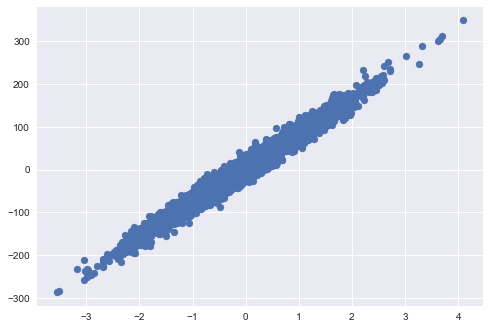

In [5]:
plt.style.use('seaborn')
plt.scatter(x_value,y_value)
plt.show()

In [6]:
x_value.shape,y_value.shape

((3750, 1), (3750, 1))

#CONVERTING IT INTO NUMPY ARRAYS USING .VALUES

In [7]:
X_train=x_value.values
Y_train=y_value.values

#NORMALISATION

In [8]:
u=X_train.mean()
std=X_train.std()
X_train=(X_train-u)/std
print(X_train.mean(),X_train.std())


3.789561257387201e-18 1.0


#MY LINEAR REGRESSION MODEL

In [65]:
def predictY(x,theta):
    return x*theta[1]+theta[0]
def gradient(X,Y,theta):
    m=X.shape[0]
    grade=np.zeros((2,))
    for i in range(m):
        ypred=predictY(X[i],theta)
        grade[0]+=(ypred-Y[i])
        grade[1]+=(ypred-Y[i])*X[i]
    return grade/m

def error(X,Y,theta):
    m=X.shape[0]
    total_error=0
    for i in range (m):
        ypred=predictY(X[i],theta)
        total_error+=(ypred-Y[i])**2
    return total_error/m   
    
    
    
    
    
def GradientDescent(X,Y,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    for i in range(100):
        grade=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grade[0]
        theta[1]=theta[1]-learning_rate*grade[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list    
   
       
        
        
        


In [66]:
theta,error_list,theta_list=GradientDescent(X_train,Y_train)

In [11]:
theta

array([ 0.6838508 , 79.90361453])

In [106]:
np.save("Theta_list",theta_list)

In [81]:
error_list[:4]

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355])]

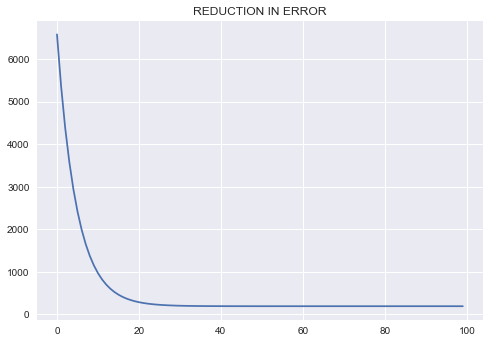

In [13]:
plt.plot(error_list)
plt.title('REDUCTION IN ERROR')
plt.show()

#VISUALIZING THE BEST FIT LINE

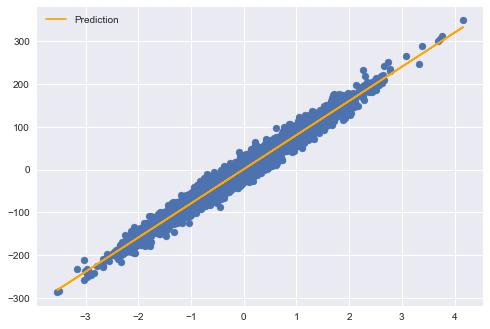

In [14]:
y_=predictY(X_train,theta)
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_,color='orange',label='Prediction')
plt.legend()
plt.show()

#PREDICTION

In [15]:
x_test=pd.read_csv('Linear_X_Test.csv')

In [16]:
X_test=x_test.values

In [17]:
Y_pred=predictY(X_test,theta)

In [18]:
df=pd.DataFrame(Y_pred,columns=['y'])

#saving the dataset in csv format

In [19]:
df.to_csv('linear_prediction.csv',index=False)

#Calculating the accuracy score-R2 (R-SQUARED) OR COEFFICIENT OF DETERMINATION 

In [20]:
def R2score(Y_train,y_):
    nume=np.sum((Y_train-y_)**2)
    denom=np.sum((Y_train-Y_train.mean())**2)
    return (1-(nume/denom))*100
    

In [21]:
R2score(Y_train,y_)

97.09612226971643

#97% IS THE SCORE WE ARE GETTING

#VISUALIZING THE LOSS FUNCTION,GRADIENT DESCENT , THETA UPDATES

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [23]:
theta

array([ 0.6838508 , 79.90361453])

#generating dummy values for theta 

In [96]:
t0=np.arange(-50,50,1)
t1=np.arange(40,120,1)


#NOW IN ORDER TO MAKE THE SURFACE FOR 3D VISUALISATION, WE WILL USE MESHGRID FUNCTION

In [97]:
t0,t1=np.meshgrid(t0,t1)

#CREATING THE LOSS FUNCTION 

In [98]:
j=np.zeros(t0.shape)
for i in range(j.shape[0]):
    for k in range(j.shape[1]):
        #squared mean error
        y_=t1[i,k]*X_train+t0[i,k]
        j[i,k]=np.sum((Y_train-y_)**2)/Y_train.shape[0]
        

#lets visualise the loss

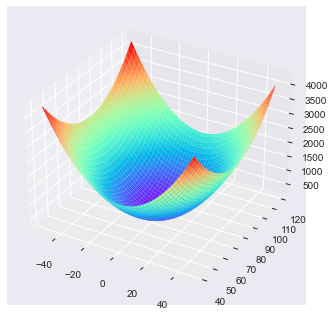

In [99]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(t0,t1,j,cmap='rainbow')
plt.show()
#A BOWL SHAPED FIGURE 

#CONTOUR PLOT 

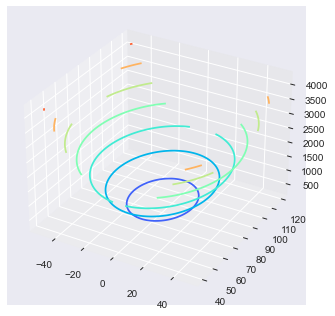

In [100]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(t0,t1,j,cmap='rainbow')
plt.show()

#VISUALIZING THE THETA UPDATES FROM THE PREVIOUS DATASET

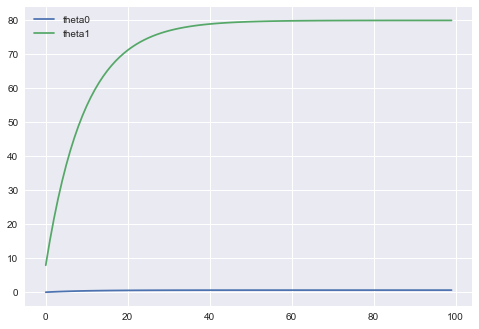

In [69]:

theta_list=np.array(theta_list)
plt.plot(theta_list[:,0],label='theta0')
plt.plot(theta_list[:,1],label='theta1')
plt.legend()
plt.show()


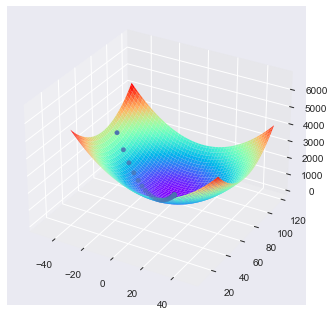

In [102]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(t0,t1,j,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

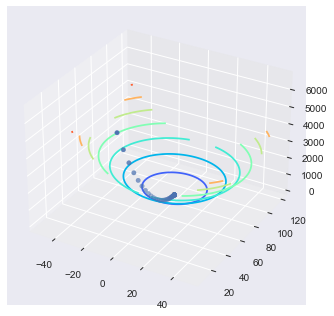

In [103]:
 fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(t0,t1,j,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

#2d Contour plot

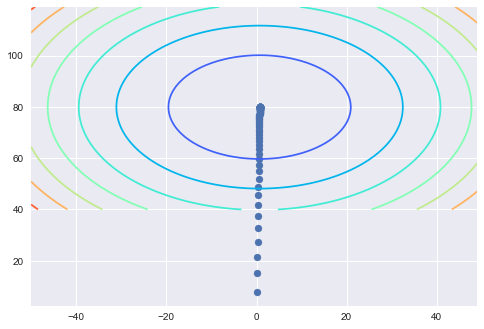

In [105]:
plt.contour(t0,t1,j,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()